In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load Wi-Fi CSI raw data

In [150]:
label=["CSI_Value"]
dataset=pd.read_csv("/home/ranjit/Thesis/CSI_Matlab/CSI_Dataset_final/No_Person/No_Person_room_Raw_CSI.csv",names=label)
dataset.head(-10)

,CSI_Value
0,0
1,0+0.00097659i
2,0-0.0004883i
3,0.0004883-0.0004883i
4,-0.0004883+0.00045778i
...,...
16465,0
16466,0.0004883-0.00097659i
16467,0.0004883
16468,0


# Drop duplicated CSI data (i.e repeated CSI data)

In [151]:
dataset.drop_duplicates(subset ="CSI_Value",keep = False, inplace = True)
dataset.head()

,CSI_Value
277,-0.0014344+0.0004883i
2458,0.0014649+0.00094607i
2521,-0.0019532+0.0004883i
2751,0.00045778+0.0014649i
2940,0.00094607+0.00094607i


# Convert CSI data into list

In [152]:
X=dataset.values
lis=X.tolist()
print(X)
# print(lis)


[['-0.0014344+0.0004883i']
 ['0.0014649+0.00094607i']
 ['-0.0019532+0.0004883i']
 ['0.00045778+0.0014649i']
 ['0.00094607+0.00094607i']
 ['0.0014344+0.00045778i']
 ['-0.0010071-0.00051881i']
 ['0.0014344-0.00051881i']
 ['-0.0010071+0.00094607i']
 ['0.0019532']
 ['-0.00097659-0.0014649i']
 ['0.00045778-0.0014649i']
 ['-0.0014649-0.00051881i']
 ['-0.0010071-0.0014649i']
 ['0.0014344-0.0004883i']
 ['0.00051881+0.0014649i']
 ['-0.00097659+0.0014649i']
 ['0.0004883+0.0019532i']
 ['-0.00097659-0.0019532i']
 ['3.0519e-05+0.0014649i']
 ['-0.0004883-0.0014954i']
 ['-0.00051881+0.00051881i']]


# Replace "i" of complex number to "j" 
Since complex number in python is written as: a + bj

In [153]:
lis1=[]
k=-1
for i in lis:
    k+=1
    for s in lis[k]:
        s = s.replace('i', 'j')
        v = complex(s)
        lis1.append(v)


In [154]:
print(lis1)

[(-0.0014344+0.0004883j), (0.0014649+0.00094607j), (-0.0019532+0.0004883j), (0.00045778+0.0014649j), (0.00094607+0.00094607j), (0.0014344+0.00045778j), (-0.0010071-0.00051881j), (0.0014344-0.00051881j), (-0.0010071+0.00094607j), (0.0019532+0j), (-0.00097659-0.0014649j), (0.00045778-0.0014649j), (-0.0014649-0.00051881j), (-0.0010071-0.0014649j), (0.0014344-0.0004883j), (0.00051881+0.0014649j), (-0.00097659+0.0014649j), (0.0004883+0.0019532j), (-0.00097659-0.0019532j), (3.0519e-05+0.0014649j), (-0.0004883-0.0014954j), (-0.00051881+0.00051881j)]


# Append Amplitude information in dataset

In [155]:
amplitudes=[]
for i in lis1:
    amp=abs(i)*1000 # Scale-up by 100 unit
    amplitudes.append(amp)

In [156]:
print(amplitudes[:10])
print("\nMaximum amplitude value=",max(amplitudes))


[1.5152360377182164, 1.7438407194752623, 2.0133124769891038, 1.5347620461817526, 1.337945024954314, 1.5056778833468998, 1.1328787340664488, 1.5253416588095927, 1.3817738074301453, 1.9532]

Maximum amplitude value= 2.1837395147086567


In [157]:

import csv
with open("/home/ranjit/Thesis/CSI_Matlab/CSI_Dataset_final/No_Person/No_Person_room_Raw_CSI.csv",'r') as csvinput:
    with open("/home/ranjit/Thesis/CSI_Matlab/CSI_Dataset_final/No_Person/No_Person_room_Amp.csv", 'w') as csvoutput:
        writer = csv.writer(csvoutput)
        i=0
        for row in csv.reader(csvinput):
            row.append(amplitudes[i])
            writer.writerow(row)
            i+=1
            if i==len(amplitudes):
                break

print("Amplitude data appended successfully")
            

Amplitude data appended successfully


In [158]:
label=["CSI_Value","Amplitude_m"]
df_amp=pd.read_csv("/home/ranjit/Thesis/CSI_Matlab/CSI_Dataset_final/No_Person/No_Person_room_Amp.csv",names=label)
df_amp.head(10)

,CSI_Value,Amplitude_m
0,0,1.515236
1,0+0.00097659i,1.743841
2,0-0.0004883i,2.013312
3,0.0004883-0.0004883i,1.534762
4,-0.0004883+0.00045778i,1.337945
5,0+0.0004883i,1.505678
6,-0.0004883,1.132879
7,0+0.0004883i,1.525342
8,0.00045778,1.381774
9,0.00045778+0.00045778i,1.953200


# Append Phase information in dataset

In [159]:
# importing "cmath" for complex number operations

import cmath
amplitudes=[]
phases=[]
for i in lis1:
    out_phase=cmath.phase(i)
    phases.append(out_phase)
    

In [160]:
print(phases[0:10])
print("\nMaximum phase value=",max(phases))


[2.8134767463665273, 0.5734351068278833, 2.896613990462929, 1.26791223580426, 0.7853981633974483, 0.3089261668642332, -2.6658967213674623, -0.34705202808246277, 2.387430966977647, 0.0]

Maximum phase value= 2.896613990462929


In [161]:
import csv
with open("/home/ranjit/Thesis/CSI_Matlab/CSI_Dataset_final/No_Person/No_Person_room_Amp.csv",'r') as csvinput:
    with open("/home/ranjit/Thesis/CSI_Matlab/CSI_Dataset_final/No_Person/No_Person_room_Phase.csv", 'w') as csvoutput:
        writer = csv.writer(csvoutput)
        j=0
        for phs_row in csv.reader(csvinput):
            phs_row.append(phases[j])
            writer.writerow(phs_row)
            j+=1
            if j==len(phases):
                break
#            print(row)

print("Phase appended successfully")
            

Phase appended successfully


In [162]:
label=["CSI Value","Amplitude_m", "Phase_rad"]
final_dataset=pd.read_csv("/home/ranjit/Thesis/CSI_Matlab/CSI_Dataset_final/No_Person/No_Person_room_Phase.csv",names=label)

final_dataset.head(10)

,CSI Value,Amplitude_m,Phase_rad
0,0,1.515236,2.813477
1,0+0.00097659i,1.743841,0.573435
2,0-0.0004883i,2.013312,2.896614
3,0.0004883-0.0004883i,1.534762,1.267912
4,-0.0004883+0.00045778i,1.337945,0.785398
5,0+0.0004883i,1.505678,0.308926
6,-0.0004883,1.132879,-2.665897
7,0+0.0004883i,1.525342,-0.347052
8,0.00045778,1.381774,2.387431
9,0.00045778+0.00045778i,1.953200,0.000000


# Activity: Walking, Standing, Sitting, Get_down, Get_up, No_Person 

In [163]:
import csv
with open("/home/ranjit/Thesis/CSI_Matlab/CSI_Dataset_final/No_Person/No_Person_room_Phase.csv",'r') as csvinput:
    with open("/home/ranjit/Thesis/CSI_Matlab/CSI_Dataset_final/No_Person/No_Person_room_Activity.csv", 'w') as csvoutput:
        writer = csv.writer(csvoutput)
        i=0
        for row in csv.reader(csvinput):
            row.append("No_Person")
            writer.writerow(row)
            i+=1
print("Activity appended successfully")

Activity appended successfully


In [164]:
label=["CSI Value","Amplitude_m", "Phase_rad","Activity"]
final_dataset=pd.read_csv("/home/ranjit/Thesis/CSI_Matlab/CSI_Dataset_final/No_Person/No_Person_room_Activity.csv",names=label)

final_dataset.head(10)

,CSI Value,Amplitude_m,Phase_rad,Activity
0,0,1.515236,2.813477,No_Person
1,0+0.00097659i,1.743841,0.573435,No_Person
2,0-0.0004883i,2.013312,2.896614,No_Person
3,0.0004883-0.0004883i,1.534762,1.267912,No_Person
4,-0.0004883+0.00045778i,1.337945,0.785398,No_Person
5,0+0.0004883i,1.505678,0.308926,No_Person
6,-0.0004883,1.132879,-2.665897,No_Person
7,0+0.0004883i,1.525342,-0.347052,No_Person
8,0.00045778,1.381774,2.387431,No_Person
9,0.00045778+0.00045778i,1.953200,0.000000,No_Person


In [165]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CSI Value    22 non-null     object 
 1   Amplitude_m  22 non-null     float64
 2   Phase_rad    22 non-null     float64
 3   Activity     22 non-null     object 
dtypes: float64(2), object(2)
memory usage: 832.0+ bytes


<AxesSubplot:title={'center':'Total number of sample Vs Activity'}>

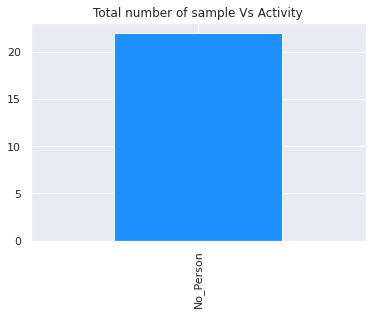

In [166]:
sns.set(color_codes=True)
final_dataset['Activity'].value_counts().plot(kind='bar',color="dodgerblue",title='Total number of sample Vs Activity')


# Final Dataset preparation

In [167]:
import csv
row_csi=[]
csi_amp=[]
csi_phs=[]
csi_activity=[]
with open("/home/ranjit/Thesis/CSI_Matlab/CSI_Dataset_final/No_Person/No_Person_room_Phase.csv",'r') as csvinput:    
        for row in csv.reader(csvinput):
            row_csi.append(row[0])
            csi_amp.append(row[1])
            csi_phs.append(row[2])
            csi_activity.append("No_Person")
            
print("All data append in respective list successfully")            
           

All data append in respective list successfully


In [168]:
# print(row_csi)

# For dataset without repeated CSI value

In [169]:

data = {'CSI_Value': row_csi,"Amplitude_m":csi_amp, "Phase_rad":csi_phs, "Activity":csi_activity }

# Make data frame of above data
df = pd.DataFrame(data)
 
# Append data frame to CSV file
df.to_csv('/home/ranjit/Thesis/CSI_Matlab/CSI_Dataset_final/All_Activity_room.csv', mode='a', index=False, header=False)
 

print("Data appended to final dataset successfully.")


Data appended to final dataset successfully.


In [170]:
# label=["CSI Value","Amplitude_m", "Phase_rad","Activity"]
df=pd.read_csv("/home/ranjit/Thesis/CSI_Matlab/CSI_Dataset_final/All_Activity_room.csv") # names=label

df.head(-10)

,CSI_Value,Amplitude_m,Phase_rad,Activity
0,0.0004883+0.0004883i,1.495711,3.121187,Walking
1,0-0.0004883i,2.589975,1.196861,Walking
2,0.00045778+0.0004883i,4.172037,-1.212026,Walking
3,0.0004883-0.0004883i,2.929800,0.000000,Walking
4,0-3.0519e-05i,2.873450,-2.606634,Walking
...,...,...,...,...
194,0+0.0004883i,1.525342,-0.347052,No_Person
195,0.00045778,1.381774,2.387431,No_Person
196,0.00045778+0.00045778i,1.953200,0.000000,No_Person
197,-3.0519e-05-0.00097659i,1.760585,-2.158794,No_Person


<AxesSubplot:title={'center':'Total number of sample Vs Activity'}>

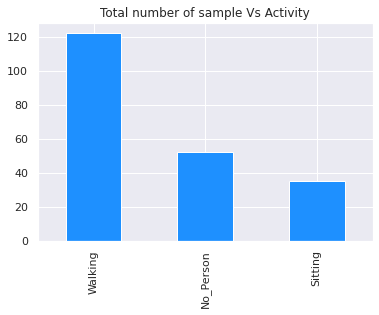

In [171]:
sns.set(color_codes=True)
df['Activity'].value_counts().plot(kind='bar',color="dodgerblue",title='Total number of sample Vs Activity')


# For dataset with repeated CSI value in dataset

In [172]:
data = {'CSI_Value': row_csi,"Amplitude_m":csi_amp, "Phase_rad":csi_phs, "Activity":csi_activity }

# Make data frame of above data
df = pd.DataFrame(data)
 
# Append data frame to CSV file
df.to_csv('/home/ranjit/Thesis/CSI_Matlab/CSI_Dataset_final/All_Activity_room_with_rep.csv', mode='a', index=False, header=False)
 

print("Data appended to final dataset successfully.")

Data appended to final dataset successfully.


In [173]:

df2=pd.read_csv("/home/ranjit/Thesis/CSI_Matlab/CSI_Dataset_final/All_Activity_room_with_rep.csv")

df2.head(-10)

,CSI_Value,Amplitude_m,Phase_rad,Activity
0,0.0004883+0.0004883i,0.690560,0.785398,Walking
1,0-0.0004883i,0.488300,-1.570796,Walking
2,0.00045778+0.0004883i,0.669328,0.817646,Walking
3,0.0004883-0.0004883i,0.690560,-0.785398,Walking
4,0-3.0519e-05i,0.030519,-1.570796,Walking
...,...,...,...,...
145467,0+0.0004883i,1.525342,-0.347052,No_Person
145468,0.00045778,1.381774,2.387431,No_Person
145469,0.00045778+0.00045778i,1.953200,0.000000,No_Person
145470,-3.0519e-05-0.00097659i,1.760585,-2.158794,No_Person


<AxesSubplot:title={'center':'Total number of sample Vs Activity'}>

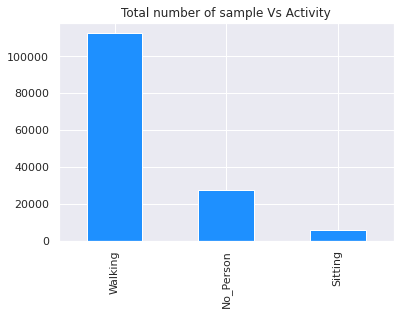

In [174]:
sns.set(color_codes=True)
df2['Activity'].value_counts().plot(kind='bar',color="dodgerblue",title='Total number of sample Vs Activity')